In [63]:
from sklearn.cluster import KMeans

from sklearn.feature_extraction import DictVectorizer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, precision_score, recall_score, make_scorer

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import json

import Feature_Extraction as fe

In [2]:
# load the dataset AquaLush

data = open('data/five_hundred_rels.CSV', encoding="ANSI").read()
label, r_aq1, r_aq2, rmix_aq = [], [], [], []
for i, line in enumerate(data.split("\n")):
    if line != '' and line.isspace() != True:
        content = line.split(';')
        label.append(content[0])
        r_aq1.append(content[1])
        r_aq2.append(content[2])
        rmix_aq.append(content[1]+content[2])

y_aq = []
for l in label:
    if l == 'true':
        y_aq.append(1)
    else:
        y_aq.append(-1)
        
        
# load the dataset_RTE

root = ET.parse('data/RTE1_dev1_3ways.xml').getroot()
r1 = []
r2 = []
y = []
for el in list(root):
    label = el.get('entailment')
    if label == 'YES':
        y.append(1)
    elif label == 'NO':
        y.append(1)
    else:
        y.append(-1)
    r1.append(list(el)[0].text)
    r2.append(list(el)[1].text)
    
root = ET.parse('data/RTE1_dev2_3ways.xml').getroot()
for el in list(root):
    label = el.get('entailment')
    if label == 'YES':
        y.append(1)
    elif label == 'NO':
        y.append(1)
    else:
        y.append(-1)
    r1.append(list(el)[0].text)
    r2.append(list(el)[1].text)
    
r1t = []
r2t = []
yt = []
root = ET.parse('data/RTE1_test_3ways.xml').getroot()
for el in list(root):
    label = el.get('entailment')
    if label == 'YES':
        yt.append(1)
    elif label == 'NO':
        yt.append(1)
    else:
        y.append(-1)
    r1t.append(list(el)[0].text)
    r2t.append(list(el)[1].text)
    
r1 = r1 + r1t
r2 = r2 + r2t
y = y + yt

In [3]:
x_ten_aq = []

for index in range(len(r_aq1)):
    x_ten_aq.append(fe.getMatureFeatures10_Pair_Raw(r_aq1[index], r_aq2[index]))
    index = index + 1

In [6]:
vec = DictVectorizer()
xx_ten_aq = vec.fit_transform(x_ten_aq).toarray()

In [26]:
kfold = 5
myscores = ['precision_macro', 'recall_macro', 'f1_macro', 'precision_micro', 'recall_micro', 'f1_micro']
skf = RepeatedStratifiedKFold(n_splits=kfold, n_repeats=10)
clf = KMeans(n_clusters=2)

scores_res = cross_validate(clf, X=xx_ten_aq, y=y_aq, cv=skf, scoring=myscores, return_train_score=True)

C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


In [28]:
data = pd.DataFrame(scores_res)
data.describe()

,fit_time,score_time,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro,test_f1_macro,train_f1_macro,test_precision_micro,train_precision_micro,test_recall_micro,train_recall_micro,test_f1_micro,train_f1_micro
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.075458,0.015351,0.031084,0.030102,0.152364,0.145780,0.050941,0.049402,0.046412,0.044648,0.046412,0.044648,0.046412,0.044648
std,0.010196,0.001401,0.012148,0.009142,0.084219,0.073911,0.020370,0.016198,0.025280,0.022708,0.025280,0.022708,0.025280,0.022708
min,0.057845,0.012964,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.068814,0.014959,0.025810,0.026937,0.100000,0.100000,0.041194,0.042217,0.030076,0.030075,0.030076,0.030075,0.030076,0.030075
50%,0.074297,0.014962,0.032002,0.030806,0.133333,0.113821,0.054795,0.048488,0.040000,0.035000,0.040000,0.035000,0.040000,0.035000
75%,0.081528,0.015959,0.038990,0.035124,0.200000,0.211382,0.065636,0.060290,0.060000,0.065000,0.060000,0.065000,0.060000,0.065000
max,0.105753,0.020948,0.052083,0.044229,0.333333,0.333333,0.090090,0.078095,0.101010,0.102500,0.101010,0.102500,0.101010,0.102500


In [29]:
x_ten = []

for index in range(len(r1)):
    x_ten.append(fe.getMatureFeatures10_Pair_Raw(r1[index], r2[index]))
    index = index + 1

In [30]:
vec = DictVectorizer()
xx_ten = vec.fit_transform(x_ten).toarray()

In [31]:
kfold = 10
myscores = ['precision_macro', 'recall_macro', 'f1_macro', 'precision_micro', 'recall_micro', 'f1_micro']
skf = RepeatedStratifiedKFold(n_splits=kfold, n_repeats=10)
clf = KMeans(n_clusters=2)

scores_res = cross_validate(clf, X=xx_ten, y=y, cv=skf, scoring=myscores, return_train_score=True)

C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


In [32]:
data = pd.DataFrame(scores_res)
data.describe()

,fit_time,score_time,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro,test_f1_macro,train_f1_macro,test_precision_micro,train_precision_micro,test_recall_micro,train_recall_micro,test_f1_micro,train_f1_micro
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.561083,0.054829,0.226954,0.226066,0.166988,0.165845,0.192098,0.191313,0.342294,0.339940,0.342294,0.339940,0.342294,0.339940
std,0.401966,0.009330,0.015417,0.008150,0.016306,0.005765,0.014671,0.006487,0.033492,0.011807,0.033492,0.011807,0.033492,0.011807
min,2.596169,0.043885,0.193237,0.216099,0.129032,0.157540,0.161074,0.182899,0.264706,0.323027,0.264706,0.323027,0.264706,0.323027
25%,3.223044,0.048869,0.213535,0.219032,0.156028,0.161460,0.179685,0.185845,0.318841,0.330827,0.318841,0.330827,0.318841,0.330827
50%,3.571644,0.051881,0.227053,0.221059,0.166667,0.164090,0.193416,0.188110,0.343066,0.336312,0.343066,0.336312,0.343066,0.336312
75%,3.863511,0.056850,0.238756,0.235334,0.179211,0.170683,0.202053,0.198114,0.367647,0.349939,0.367647,0.349939,0.367647,0.349939
max,4.644570,0.087774,0.254902,0.238724,0.202128,0.196988,0.219512,0.214872,0.413043,0.403737,0.413043,0.403737,0.413043,0.403737


In [34]:
x_all_old_aq = []
for index in range(len(r_aq1)):
    x_all_old_aq.append(fe.createFBag(r_aq1[index], r_aq2[index]))
    index = index + 1

In [35]:
vec = DictVectorizer()
xx_all_old_aq = vec.fit_transform(x_all_old_aq).toarray()

In [36]:
kfold = 5
myscores = ['precision_macro', 'recall_macro', 'f1_macro', 'precision_micro', 'recall_micro', 'f1_micro']
skf = RepeatedStratifiedKFold(n_splits=kfold, n_repeats=10)
clf = KMeans(n_clusters=2)

scores_res = cross_validate(clf, X=xx_all_old_aq, y=y_aq, cv=skf, scoring=myscores, return_train_score=True)

C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.


In [37]:
data = pd.DataFrame(scores_res)
data.describe()

,fit_time,score_time,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro,test_f1_macro,train_f1_macro,test_precision_micro,train_precision_micro,test_recall_micro,train_recall_micro,test_f1_micro,train_f1_micro
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.058374,0.022027,0.034761,0.035552,0.153879,0.160203,0.056319,0.057907,0.047194,0.049000,0.047194,0.049000,0.047194,0.049000
std,0.011777,0.005124,0.024914,0.023029,0.087883,0.077674,0.038799,0.035962,0.027095,0.023726,0.027095,0.023726,0.027095,0.023726
min,0.036900,0.013963,0.005464,0.008696,0.030303,0.048780,0.009259,0.014760,0.009901,0.015000,0.009901,0.015000,0.009901,0.015000
25%,0.051101,0.017962,0.011696,0.015543,0.066667,0.093140,0.019681,0.026640,0.020000,0.028177,0.020000,0.028177,0.020000,0.028177
50%,0.056345,0.021437,0.024515,0.020243,0.142424,0.121951,0.041830,0.034723,0.044954,0.037500,0.044954,0.037500,0.044954,0.037500
75%,0.062551,0.024948,0.059150,0.059660,0.233333,0.241870,0.095238,0.096459,0.070530,0.074330,0.070530,0.074330,0.070530,0.074330
max,0.092364,0.033910,0.080808,0.071279,0.300000,0.276423,0.124031,0.113333,0.090909,0.085000,0.090909,0.085000,0.090909,0.085000


In [59]:
def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

def doHyperParameterTuning(X, y, clfs_params):
    kfold = 5
    inner_skf = StratifiedKFold(n_splits=kfold)
    outer_skf = RepeatedStratifiedKFold(n_splits=kfold, n_repeats=10, random_state=1)

    
    data = {'precision_macro': {}, 'recall_macro' : {}, 'f1_macro' : {},
            'tp' : {}, 'fp' : {}, 'tn' : {}, 'fn' : {}}
        
    models = []
    #for parameter tuning we only take f1 into consideration
    scores = ["f1"]
    for score in scores:
        for clf in clfs_params.keys():
            print()
            print("************************************************************")
            print("Model:", clf)
            print()
            if clfs_params[clf] != []:
                gscv = GridSearchCV(estimator=clf, param_grid=clfs_params[clf], cv=inner_skf, scoring = score, n_jobs=-1)
                gscv.fit(X, y)
                print(gscv.best_params_)
                means = gscv.cv_results_['mean_test_score']
                stds = gscv.cv_results_['std_test_score']
                for mean, std, params in zip(means, stds, gscv.cv_results_['params']):
                    print("%0.2f (+/-%0.02f) for %r" % (mean, std * 2, params))
                the_clf = gscv.best_estimator_
            else:
                the_clf = clf
            models.append(the_clf)
            scoring =  {'precision_macro':'precision_macro', 'recall_macro':'recall_macro', 'f1_macro':'f1_macro', 'tp': make_scorer(tp), 'tn': make_scorer(tn), 'fp': make_scorer(fp), 'fn': make_scorer(fn)}   
            res = cross_validate(the_clf, X=X, y=y, cv=outer_skf, scoring=scoring, n_jobs=-1)
            for scr in scoring.keys():
                data[scr][type(clf).__name__] = res['test_' + scr].tolist()
    return data, models

In [64]:
import warnings

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import Birch
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift

warnings.filterwarnings('ignore')

modelparams = {KMeans(n_clusters=2):[],
               MiniBatchKMeans(n_clusters=2):[],
               AffinityPropagation(): [],
              MeanShift(bandwidth=2):[],
              Birch(branching_factor=50, n_clusters=2, compute_labels=True):[]}

mydata, final_models = doHyperParameterTuning(xx_ten_aq, y_aq, modelparams)

json = json.dumps(mydata)
f = open("results.json","w")
f.write(json)
f.close()


************************************************************
Model: KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


************************************************************
Model: MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=2, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)


************************************************************
Model: AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.5, max_iter=200, preference=None, verbose=False)


************************************************************
Model: MeanShift(bandwidth=2, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)


**

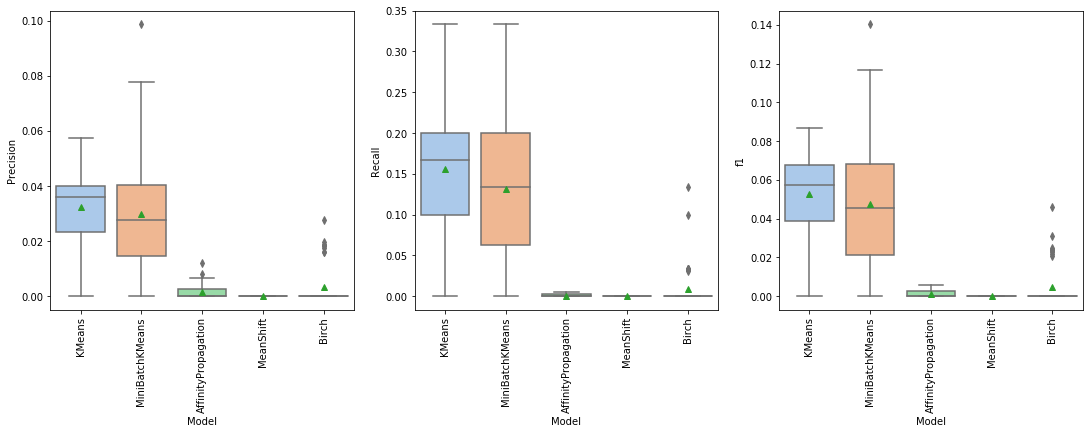

In [67]:
precision_df = pd.DataFrame(mydata['precision_macro'])
recall_df = pd.DataFrame(mydata['recall_macro'])
f1_df = pd.DataFrame(mydata['f1_macro'])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18.5, 5.5)

axp = sns.boxplot(data=precision_df, showmeans=True, palette="pastel", ax=ax1)
#axp = sns.swarmplot(data=precision_df, size=3, orient="v", color='.2', alpha=0.5, ax=ax1)
axp.set(xlabel='Model', ylabel='Precision')
axp.set_xticklabels(axp.get_xticklabels(),rotation=90)

axr = sns.boxplot(data=recall_df, showmeans=True, palette="pastel", ax=ax2)
#axp = sns.swarmplot(data=recall_df, size=3, orient="v", color='.2', alpha=0.5, ax=ax2)
axr.set(xlabel='Model', ylabel='Recall')
axr.set_xticklabels(axp.get_xticklabels(),rotation=90)

axr = sns.boxplot(data=f1_df, showmeans=True, palette="pastel", ax=ax3)
#axp = sns.swarmplot(data=f1_df, size=3, orient="v", color='.2', alpha=0.5, ax=ax3)
axr.set(xlabel='Model', ylabel='f1')
axr.set_xticklabels(axp.get_xticklabels(),rotation=90)

plt.savefig('modelcomparison_1.pdf', bbox_inches = "tight")

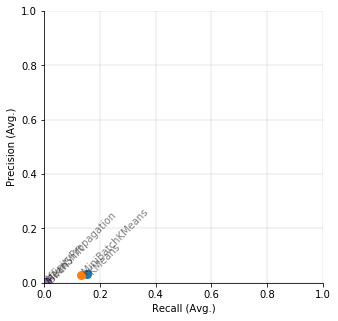

In [68]:
tmp_dic = {}
for m in precision_df:
    tmp_dic[m] = [np.mean(precision_df[m]), np.mean(recall_df[m])]
tmp_df = pd.DataFrame(tmp_dic, index=['Precision', 'Recall'])
tmp_df = tmp_df.T

fig, ax = plt.subplots(figsize=(5, 5))
for index, row in tmp_df.iterrows():
    ax .plot(row['Recall'], row['Precision'], marker='o', linestyle='', ms=8, label=index)
for i in tmp_df.index.values:
    ax.annotate(i, (tmp_df.loc[i]['Recall'], tmp_df.loc[i]['Precision']), alpha=0.5, rotation=45)
ax.set_ylim(ymin=0, ymax=1)
ax.set_xlim(xmin=0, xmax=1) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.8)
ax.set_xlabel('Recall (Avg.)')
ax.set_ylabel('Precision (Avg.)')

plt.savefig('modelcomparison_2.pdf', bbox_inches = "tight")